# Red Wine Quality Prediction

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the Dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df["quality"].unique()
# label quality has 6x unique values

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
#Encoding
df["quality"]=df["quality"].astype('str')
df["quality"]=df["quality"].map({"3":0,"4":0,"5":0,"6":0,"7":1,"8":1})
# 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'

In [9]:
df["quality"].unique()

array([0, 1], dtype=int64)

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [11]:
# All  the features are continuos in nature while label is categorical.

# Visualization of Dataset
COUNT PLOT

<AxesSubplot:xlabel='quality', ylabel='count'>

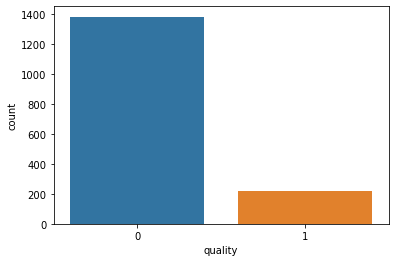

In [12]:
sns.countplot(df["quality"])
# Countplot of label shows that the label data is imbalanced and requires stratification

PAIR PLOT

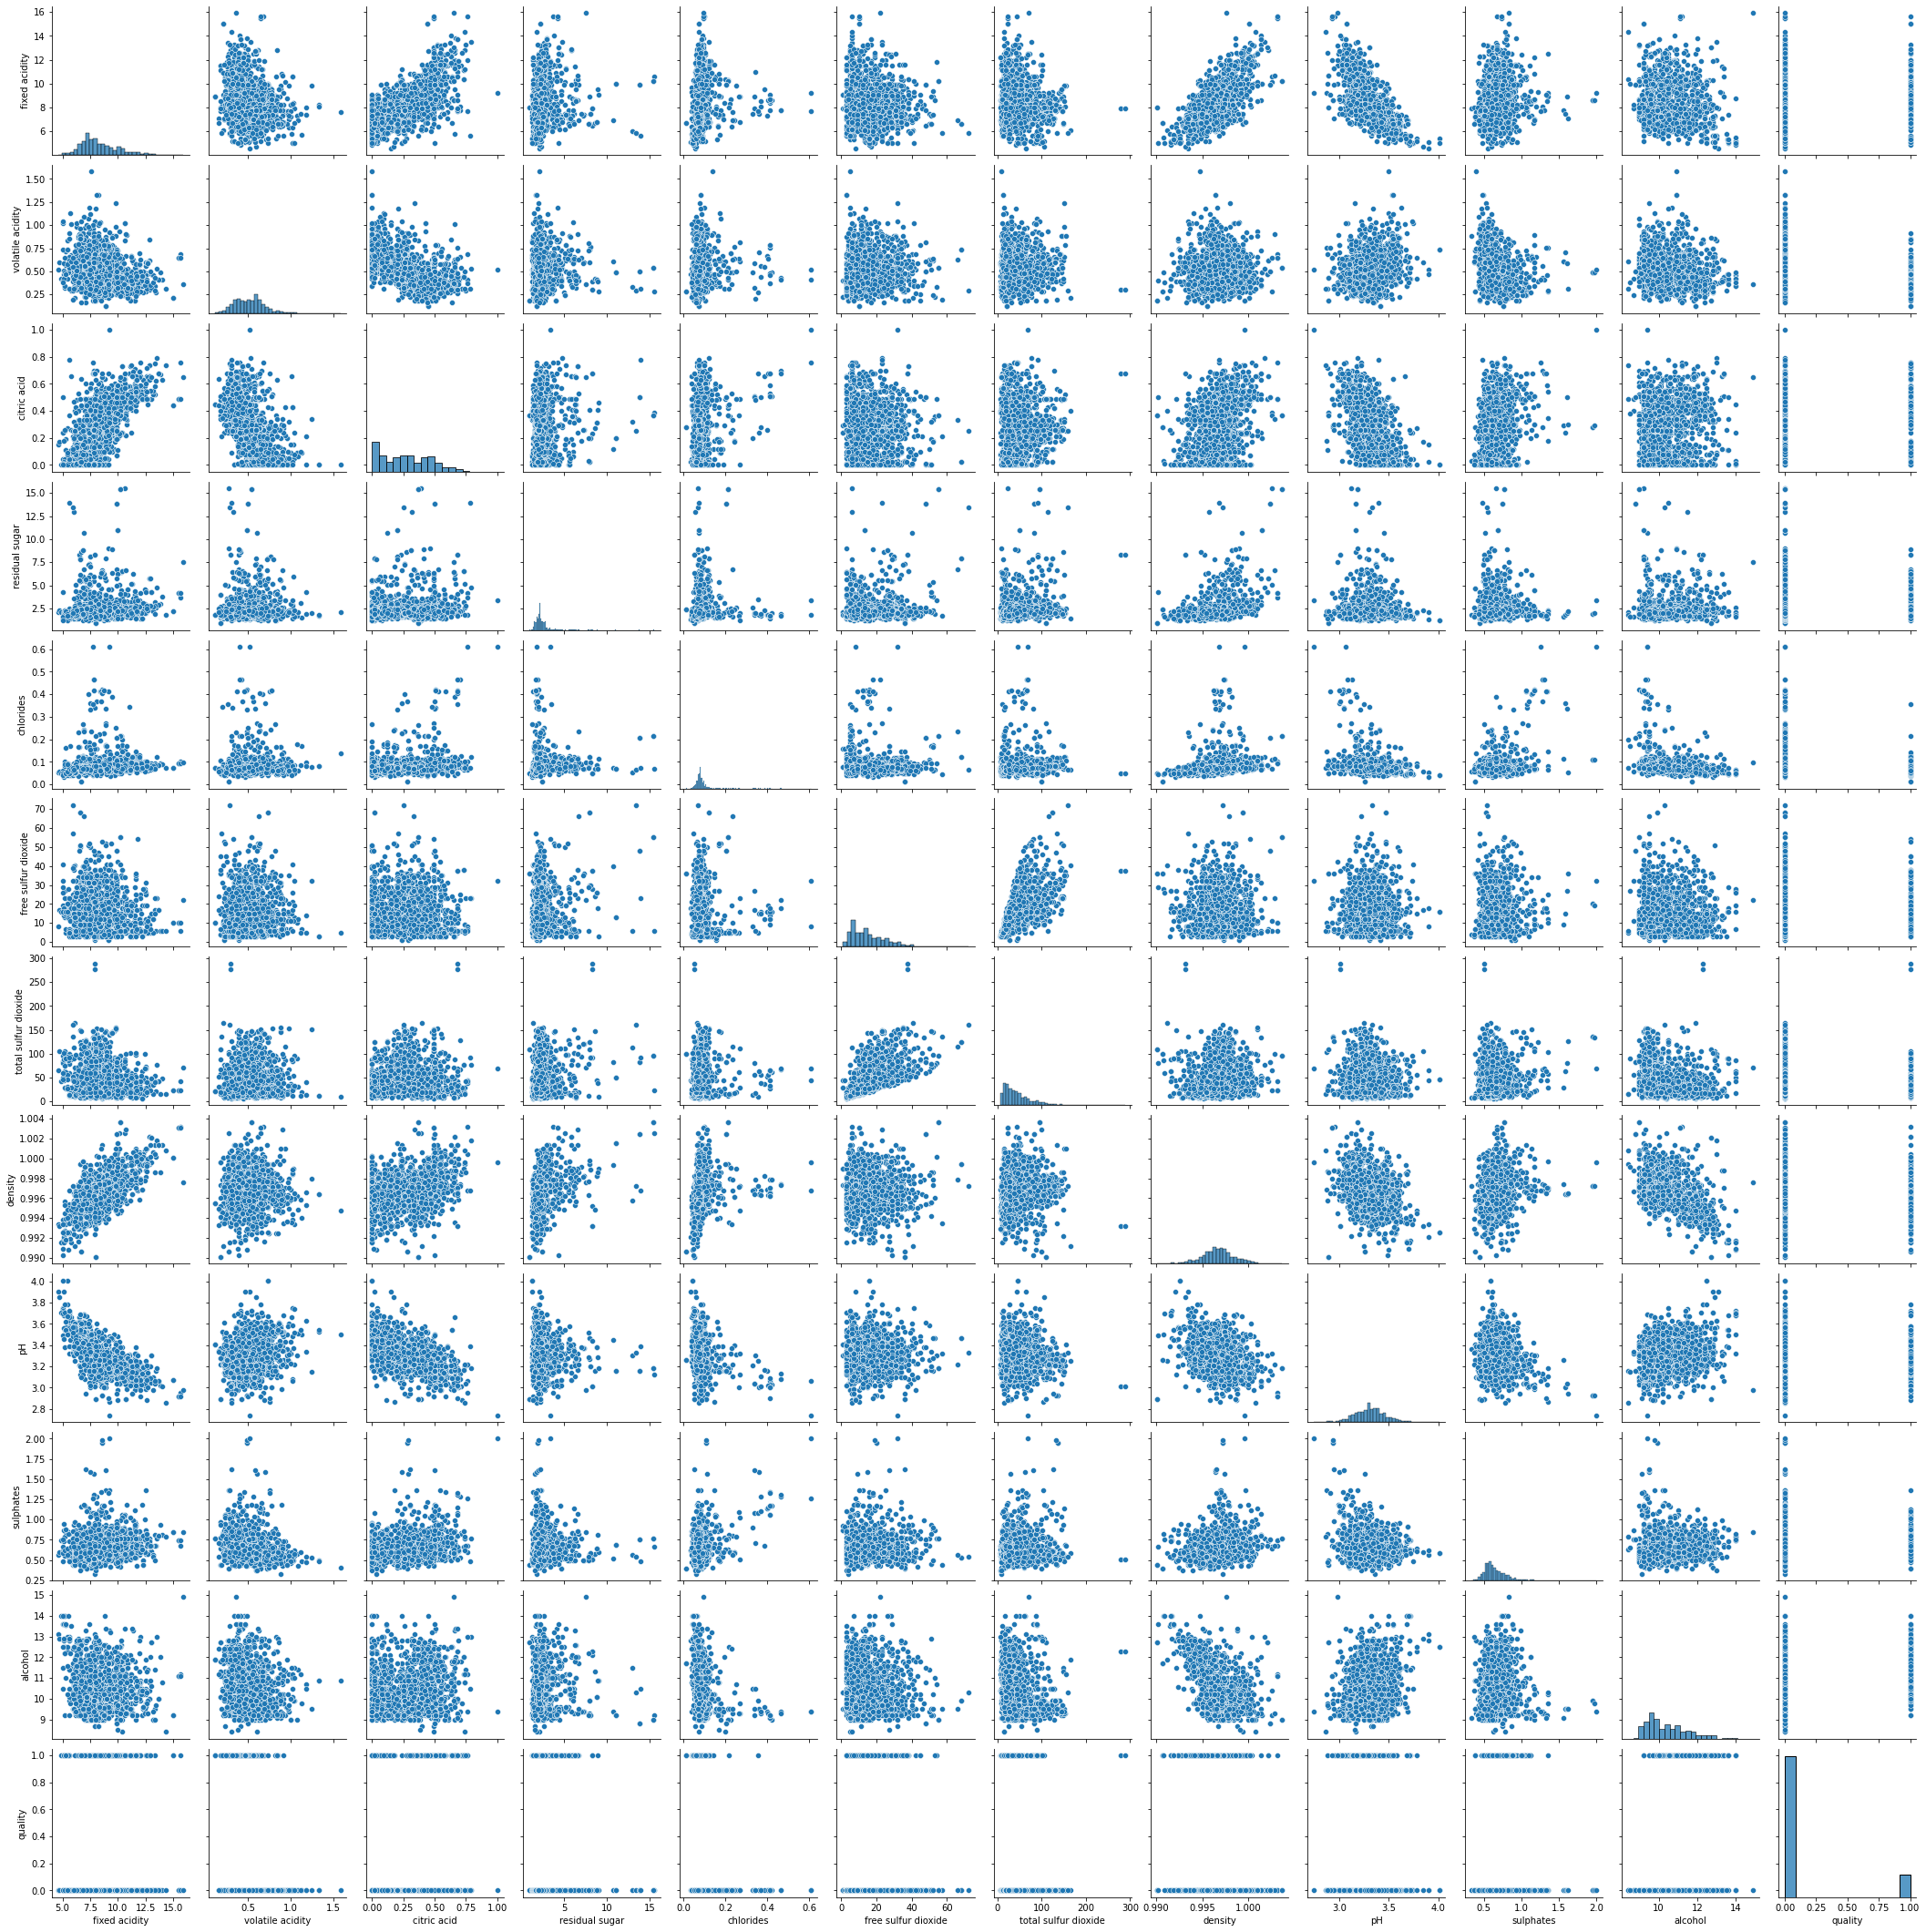

In [13]:
sns.pairplot(df)

SCATTER PLOT

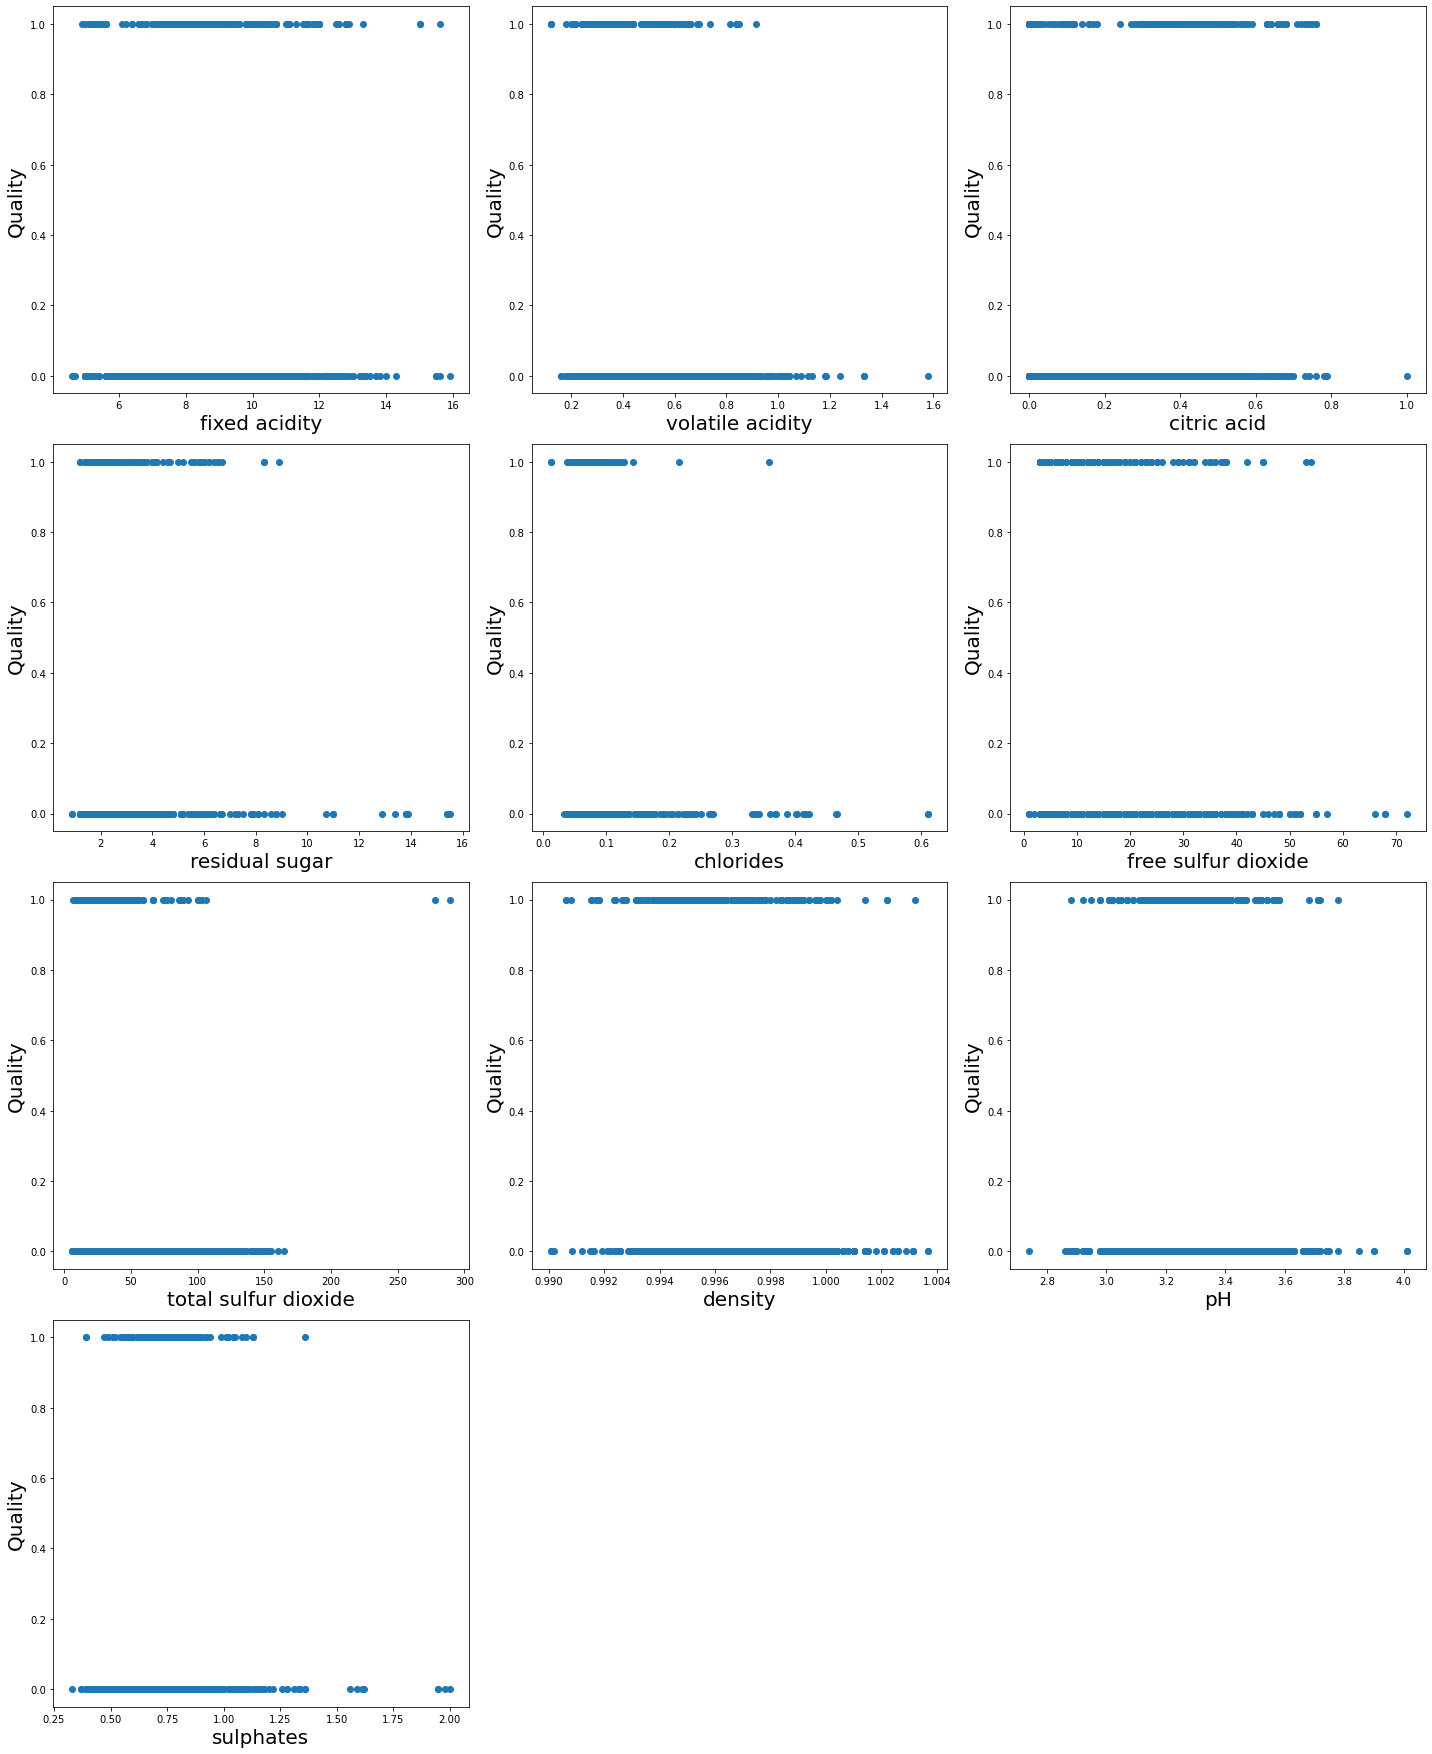

In [14]:
X=df.drop(columns='quality')
Y=df[['quality']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Quality',fontsize=20)
    plotnumber+=1
plt.tight_layout()

BOX PLOT and DIST PLOT

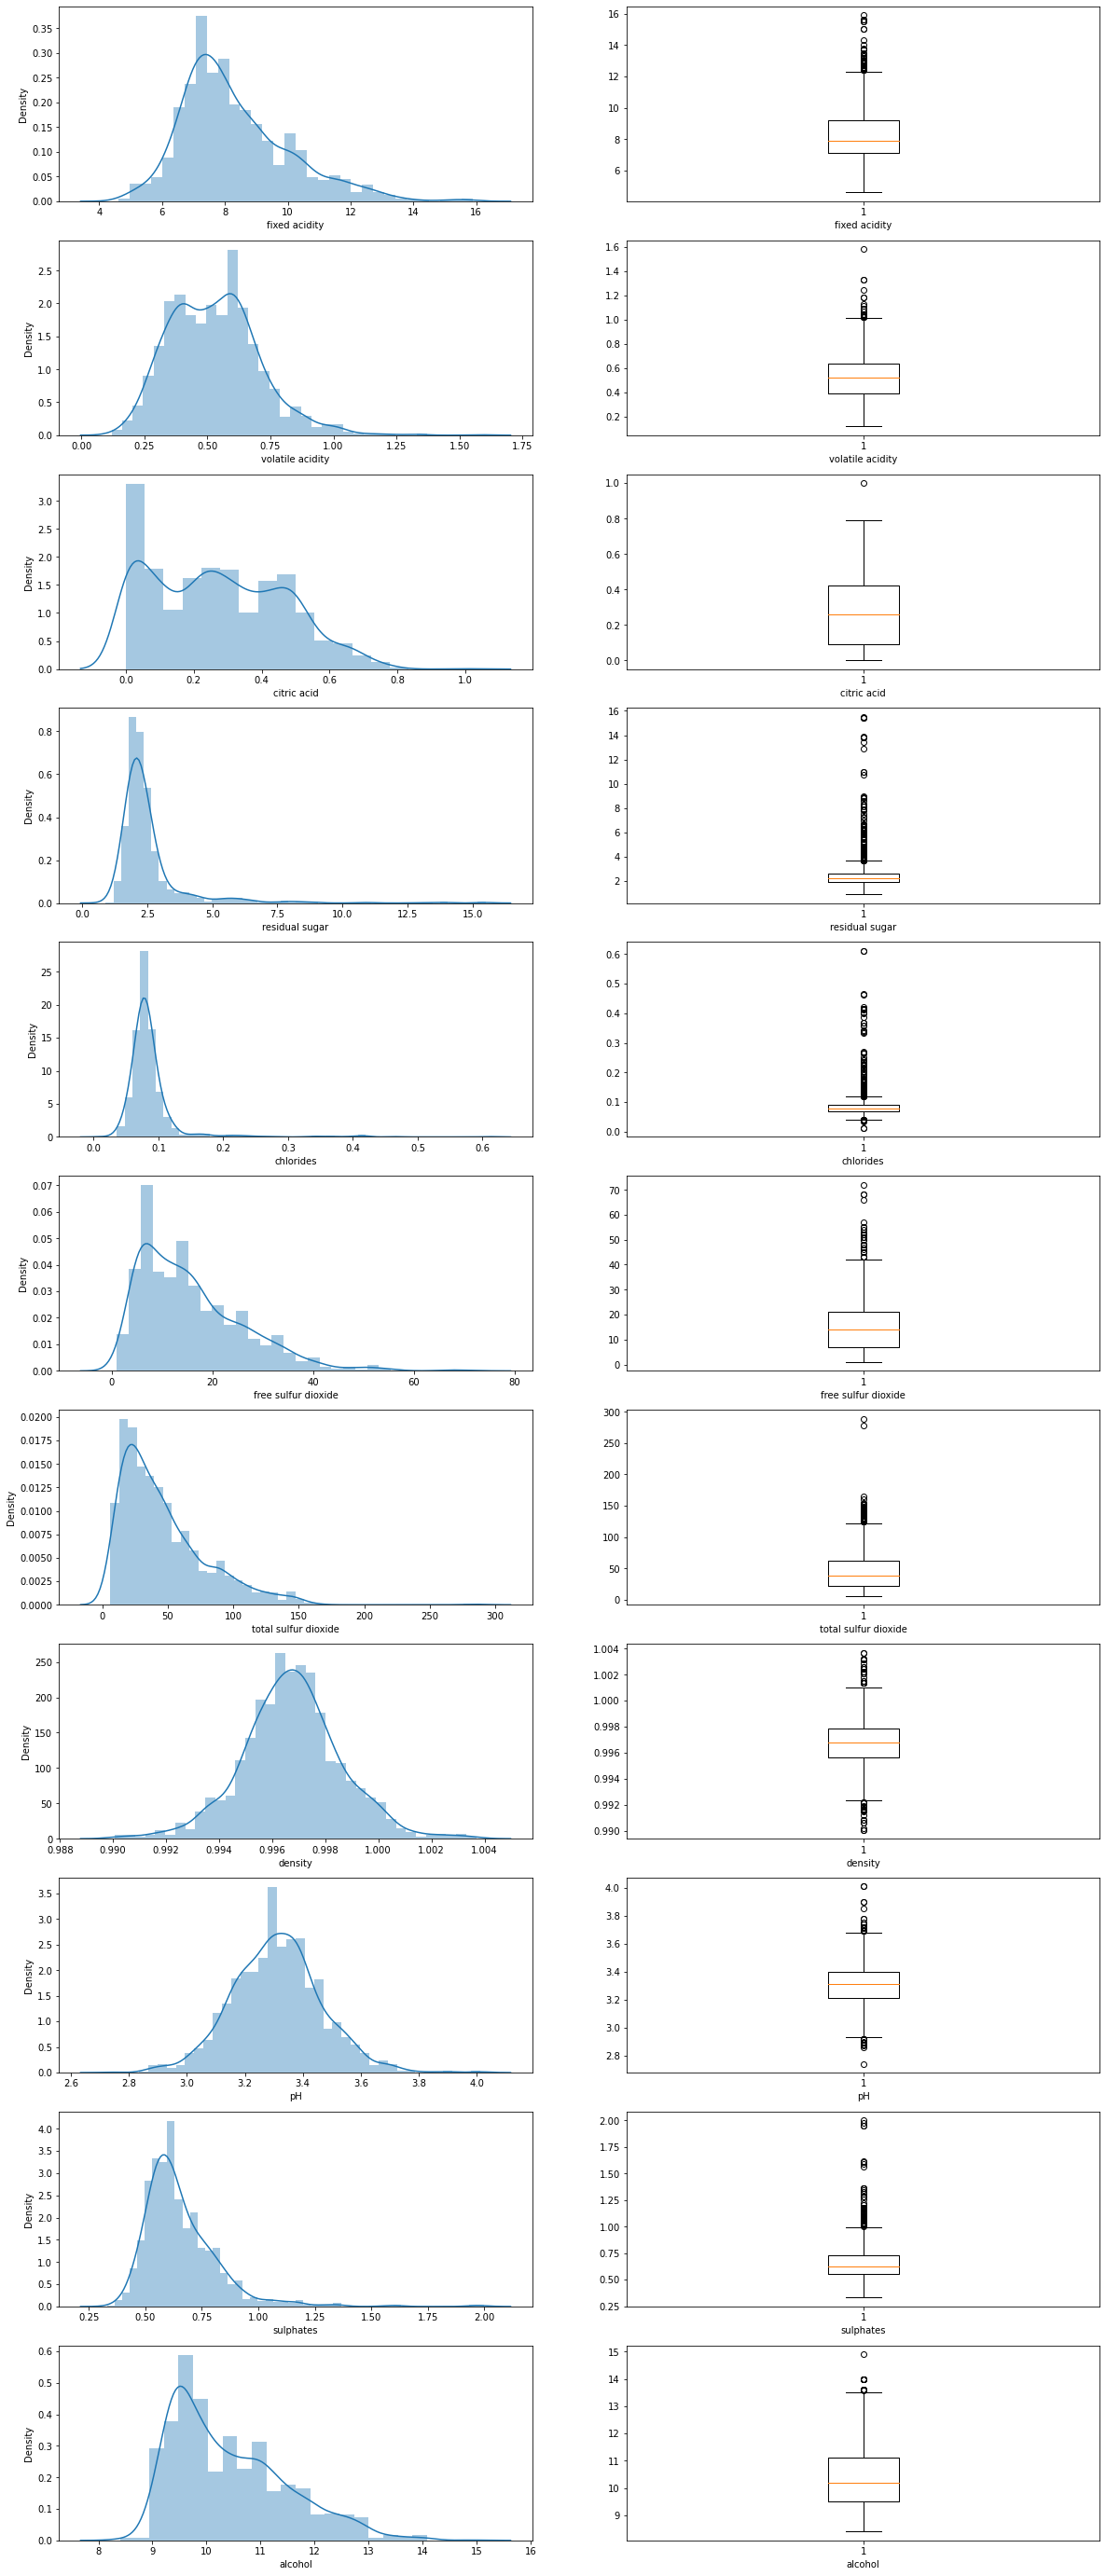

In [15]:
heart_NUM = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

#  plot Numerical Data
a = 11  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    

plt.show()

In [16]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [17]:
# Except citric acid feature all other feature have Outliers and has to be removed

In [18]:
# Removing outliers using zscore
from scipy.stats import zscore
z_score=zscore(df[["pH","chlorides","density"]])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [19]:
df.skew()

fixed acidity           0.932378
volatile acidity        0.695575
citric acid             0.306952
residual sugar          3.859819
chlorides               2.223979
free sulfur dioxide     1.198236
total sulfur dioxide    1.565475
density                 0.021996
pH                      0.069379
sulphates               2.291831
alcohol                 0.844499
quality                 2.116580
dtype: float64

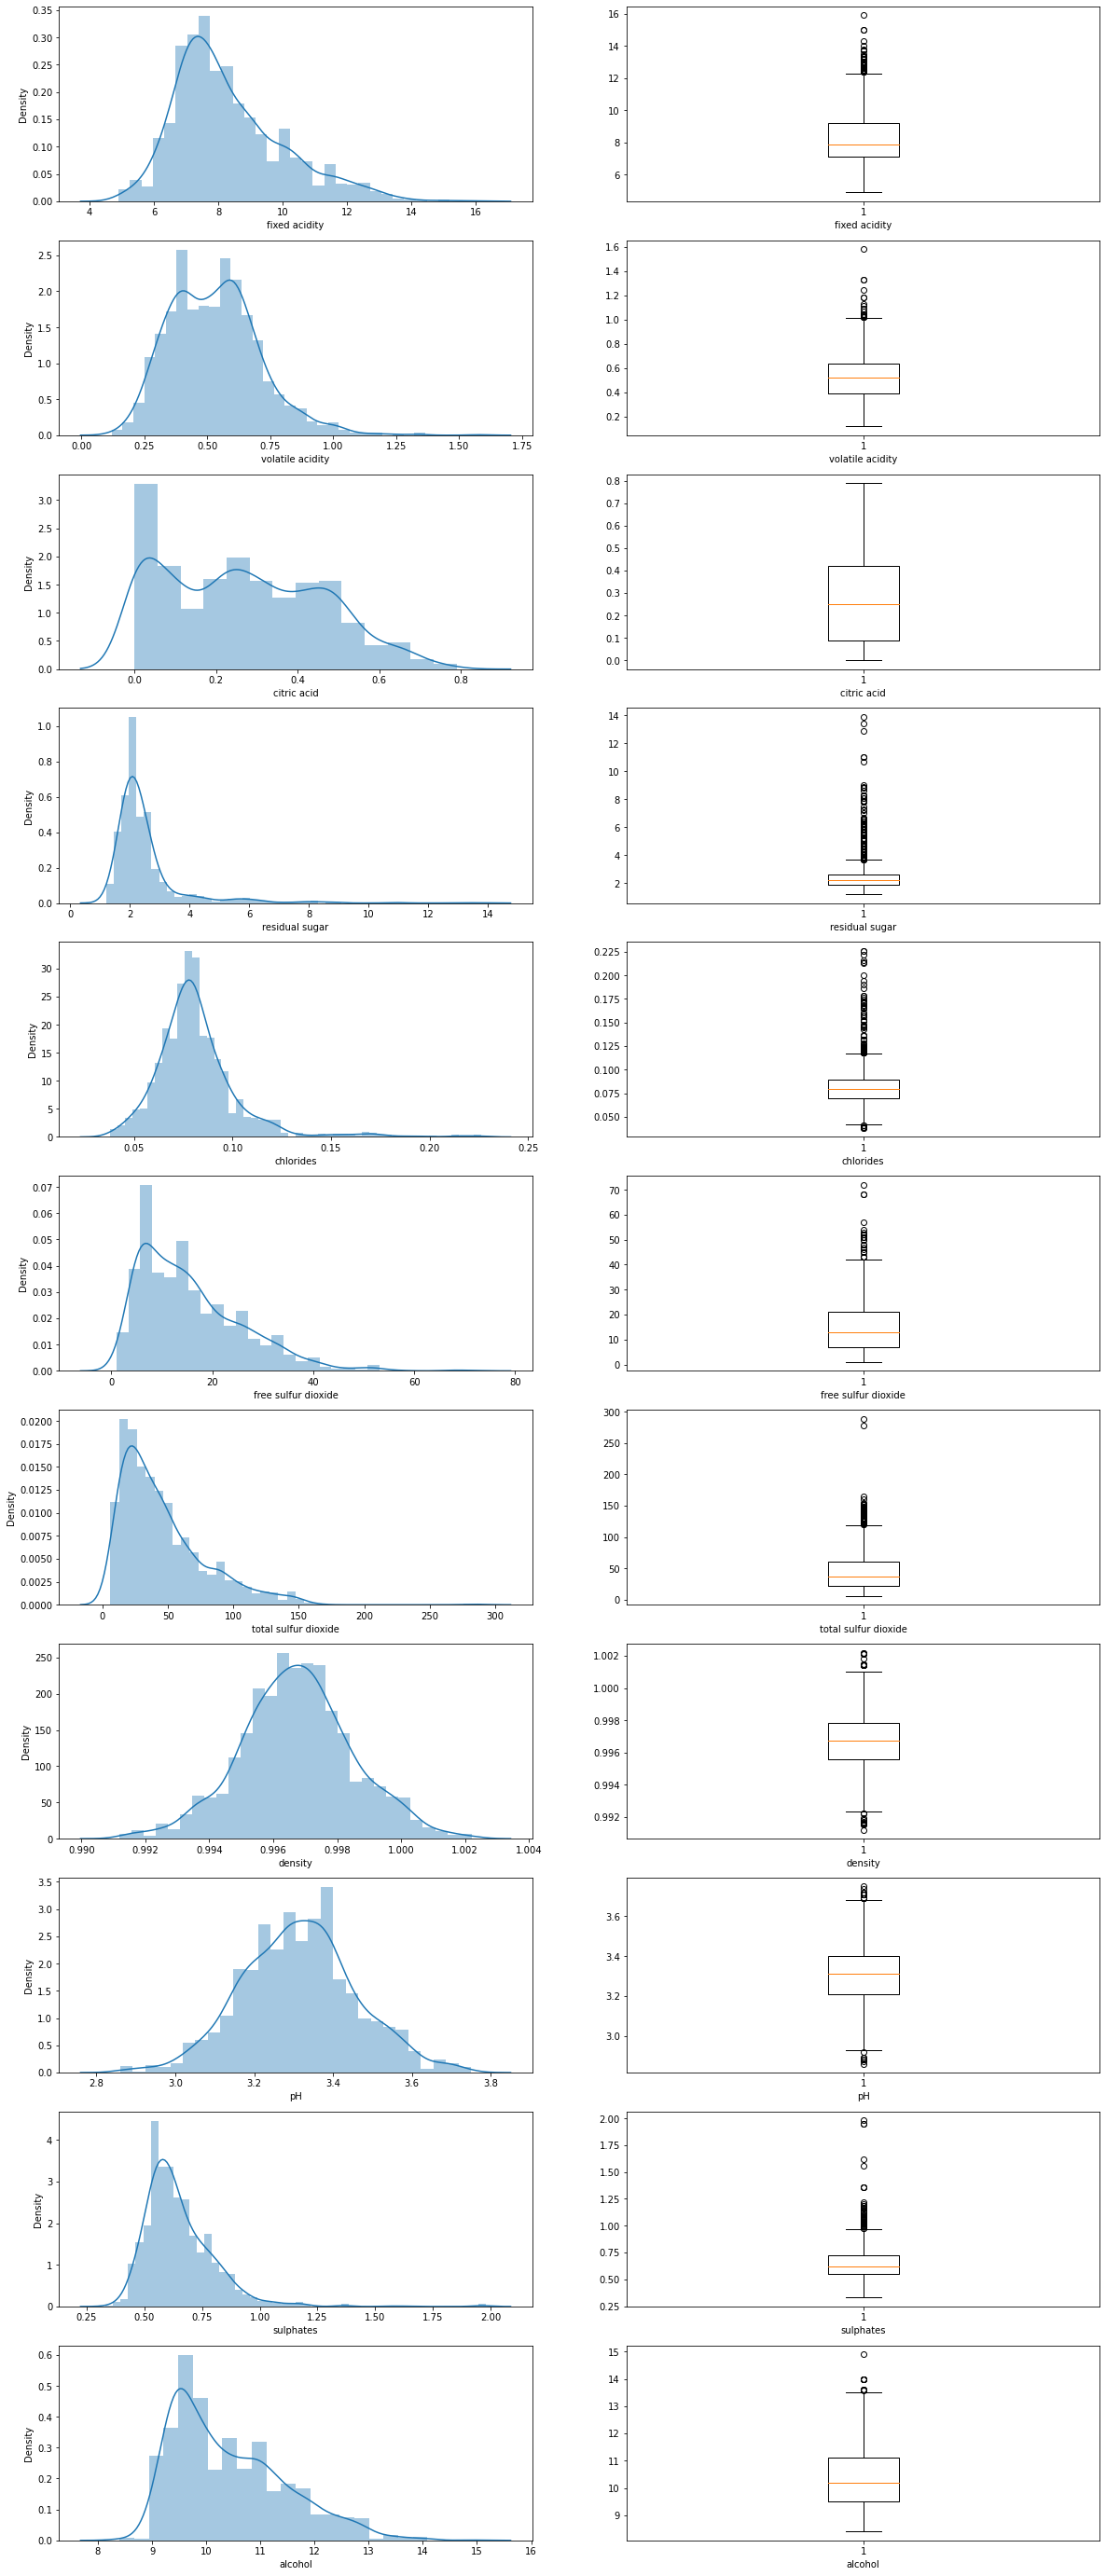

In [20]:
heart_NUM = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

#  plot Numerical Data
a = 11  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    

plt.show()

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,8.318276,0.527784,0.266241,2.504407,0.081913,15.731367,46.012962,0.996743,3.314012,0.650039,10.421225,0.136747
std,1.702216,0.179473,0.191925,1.232034,0.021859,10.288491,32.952145,0.001774,0.145303,0.154345,1.044408,0.343691
min,4.900000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991200,2.860000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996740,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997810,3.400000,0.720000,11.100000,0.000000
max,15.900000,1.580000,0.790000,13.900000,0.226000,72.000000,289.000000,1.002200,3.750000,1.980000,14.900000,1.000000


In [22]:
# Outliers have been removed using Z score < 3, 3.5% data lost.
# Futher removal of outliers will have more data loss which will result in model fitness.

# Heatmap and VIF

In [23]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.279083,0.689164,0.081282,0.175891,0.157836,0.109408,0.656805,0.693579,0.201018,0.035082,0.129742
volatile acidity,0.279083,1.000000,0.572719,0.004314,0.119221,0.003791,0.080380,0.001603,0.252917,0.304908,0.202628,0.271115
citric acid,0.689164,0.572719,1.000000,0.142334,0.082528,0.073144,0.030180,0.366484,0.527741,0.271148,0.150557,0.228317
residual sugar,0.081282,0.004314,0.142334,1.000000,0.076830,0.136116,0.211467,0.295574,0.067095,0.007804,0.099700,0.066729
chlorides,0.175891,0.119221,0.082528,0.076830,1.000000,0.022369,0.054840,0.323809,0.183830,0.055047,0.225255,0.123316
free sulfur dioxide,0.157836,0.003791,0.073144,0.136116,0.022369,1.000000,0.666167,0.024924,0.091312,0.054726,0.074452,0.076902
total sulfur dioxide,0.109408,0.080380,0.030180,0.211467,0.054840,0.666167,1.000000,0.092118,0.061746,0.034742,0.220358,0.145029
density,0.656805,0.001603,0.366484,0.295574,0.323809,0.024924,0.092118,1.000000,0.323523,0.144273,0.484245,0.150412
pH,0.693579,0.252917,0.527741,0.067095,0.183830,0.091312,0.061746,0.323523,1.000000,0.125907,0.159591,0.072545
sulphates,0.201018,0.304908,0.271148,0.007804,0.055047,0.054726,0.034742,0.144273,0.125907,1.000000,0.169744,0.246603


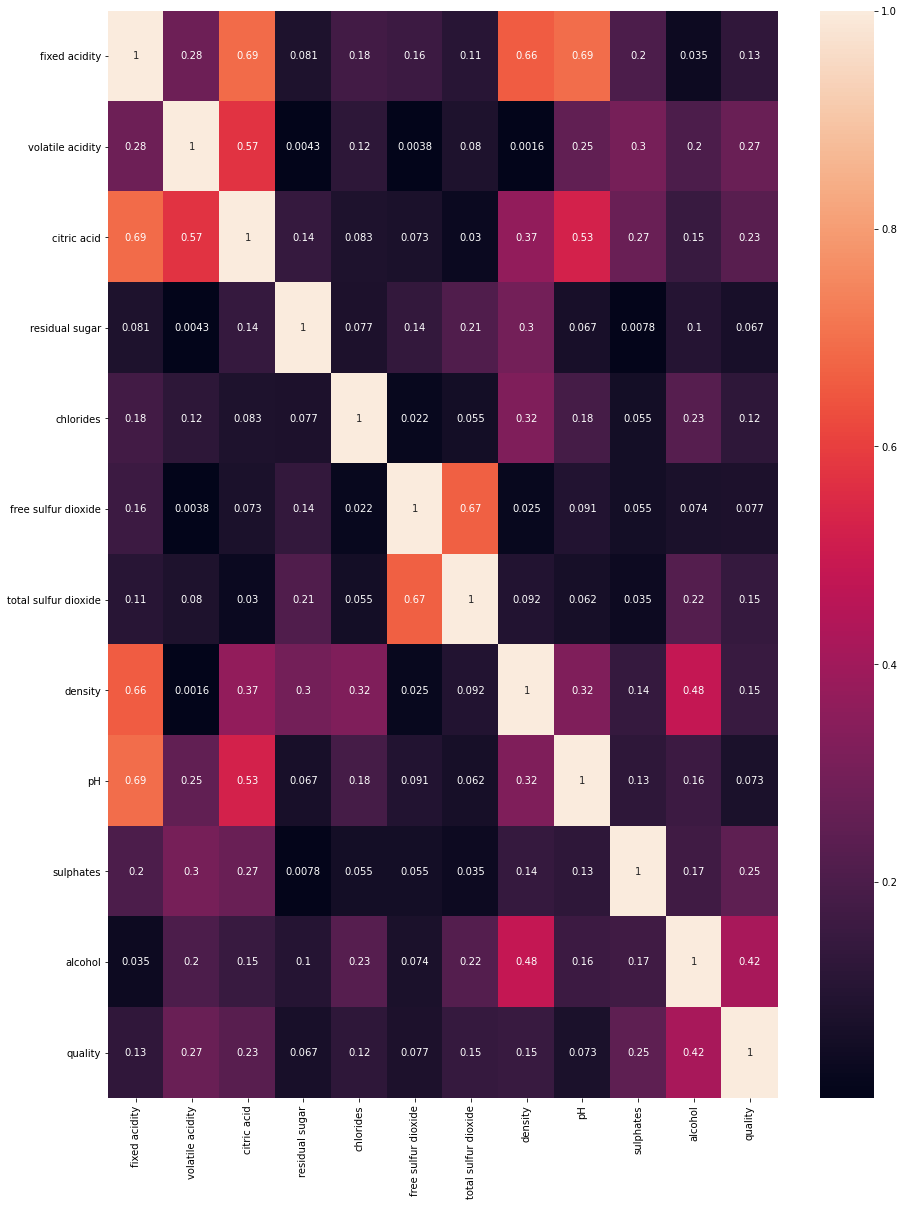

In [24]:
plt.figure(figsize=(15,20))
sns.heatmap(df_corr,annot=True)
plt.show()
# Low multicollinearity exist between features and labels 

In [25]:
X=df.drop(columns='quality')
Y=df[['quality']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,7.619946,fixed acidity
1,1.813722,volatile acidity
2,3.098711,citric acid
3,1.625570,residual sugar
4,1.180612,chlorides
5,1.956948,free sulfur dioxide
6,2.251962,total sulfur dioxide
7,6.087378,density
8,3.169654,pH
9,1.258239,sulphates


In [26]:
# VIF value of fixed acidity is quite high (>5), hence dropping the column

In [27]:
df.drop(["fixed acidity"],axis=1,inplace=True)

In [28]:
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [29]:
X=df.drop(columns='quality')
Y=df[['quality']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.808446,volatile acidity
1,2.756614,citric acid
2,1.338003,residual sugar
3,1.161564,chlorides
4,1.934284,free sulfur dioxide
5,2.132045,total sulfur dioxide
6,2.466411,density
7,1.543411,pH
8,1.232473,sulphates
9,2.152979,alcohol


In [30]:
# No Multicollineaity and VIF is within prescribed value

<AxesSubplot:xlabel='quality', ylabel='count'>

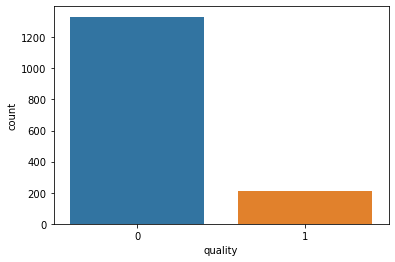

In [31]:
sns.countplot(df["quality"])
# Countplot of label shows that the label data is imbalanced and requires stratification

In [32]:
X=df.drop(columns='quality')
Y=df[['quality']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,stratify=Y,random_state=21) 
# Imbalanced label is dealt with using stratify technique

# KNN

In [33]:
knn=KNeighborsClassifier()

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
Y_pred=knn.predict(X_test)

In [36]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[386,  14],
       [ 51,  12]], dtype=int64)

In [37]:
accuracy=accuracy_score(Y_test,Y_pred)

In [38]:
accuracy

0.8596112311015118

In [39]:
auc=roc_auc_score(Y_test,Y_pred)

In [40]:
auc

0.5777380952380952

In [41]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

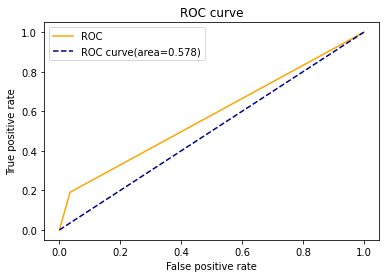

In [42]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       400
           1       0.46      0.19      0.27        63

    accuracy                           0.86       463
   macro avg       0.67      0.58      0.60       463
weighted avg       0.83      0.86      0.83       463



# USING KNN WITH HYPERPARAMETER TUNING

In [44]:
knn=KNeighborsClassifier()

In [45]:
param_grid=[
    {'algorithm':['kd_tree','brute'],
    'leaf_size':[15,18],
    'n_neighbors':[3,5,7]
    }
]

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1,verbose=2)

In [48]:
clf.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute'],
                          'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]}],
             verbose=2)

In [49]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [50]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [51]:
accuracy=accuracy_score(Y_test,Y_pred)

In [52]:
accuracy

0.8596112311015118

In [53]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[386,  14],
       [ 51,  12]], dtype=int64)

In [54]:
auc=roc_auc_score(Y_test,Y_pred)

In [55]:
auc

0.5777380952380952

In [56]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

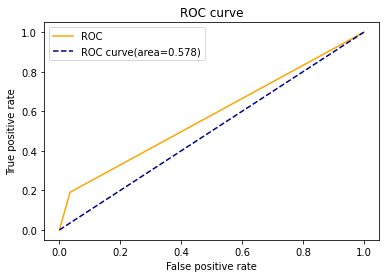

In [57]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       400
           1       0.46      0.19      0.27        63

    accuracy                           0.86       463
   macro avg       0.67      0.58      0.60       463
weighted avg       0.83      0.86      0.83       463



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[395   5]
 [ 33  30]]
0.91792656587473
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       400
           1       0.86      0.48      0.61        63

    accuracy                           0.92       463
   macro avg       0.89      0.73      0.78       463
weighted avg       0.91      0.92      0.91       463



In [61]:
auc=roc_auc_score(Y_test,Y_pred)

In [62]:
auc

0.7318452380952382

In [63]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

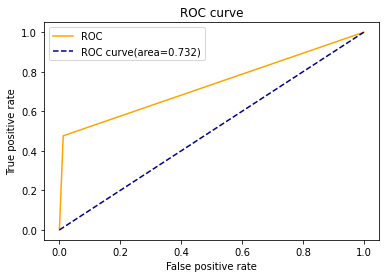

In [64]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Random Forest with Random and Grid Search CV

In [65]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [66]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [67]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [68]:
best_random_grid=rf_randomcv.best_estimator_

In [69]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=600)

In [70]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[393   7]
 [ 30  33]]
Accuracy Score 0.9200863930885529
Classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       400
           1       0.82      0.52      0.64        63

    accuracy                           0.92       463
   macro avg       0.88      0.75      0.80       463
weighted avg       0.91      0.92      0.91       463



# GRID SEARCH CV

In [71]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100,200,300,400] 
                     
                     
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [100, 200, 300, 400]}


In [73]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [74]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [75]:
best_grid=grid_search.best_estimator_

In [76]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [77]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[393   7]
 [ 31  32]]
Accuracy Score 0.91792656587473
Classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.95       400
           1       0.82      0.51      0.63        63

    accuracy                           0.92       463
   macro avg       0.87      0.75      0.79       463
weighted avg       0.91      0.92      0.91       463



In [78]:
accuracy=accuracy_score(Y_test,Y_pred)

In [79]:
accuracy

0.91792656587473

In [80]:
auc=roc_auc_score(Y_test,Y_pred)

In [81]:
auc

0.745218253968254

In [82]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

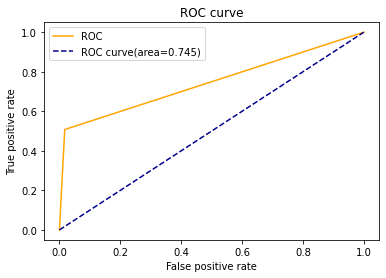

In [83]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Decision Tree

In [84]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [85]:
Y_pred=dt.predict(X_test)


In [86]:
accuracy=accuracy_score(Y_test,Y_pred)

In [87]:
accuracy

0.8617710583153347

In [88]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[365,  35],
       [ 29,  34]], dtype=int64)

In [89]:
auc=roc_auc_score(Y_test,Y_pred)

In [90]:
auc

0.7260912698412698

In [91]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

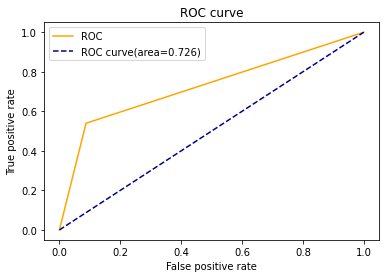

In [92]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [93]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       400
           1       0.49      0.54      0.52        63

    accuracy                           0.86       463
   macro avg       0.71      0.73      0.72       463
weighted avg       0.87      0.86      0.86       463



# DECISIONTREE WITH HYPER PARAMETER

In [94]:
dt=DecisionTreeClassifier()


In [95]:
param_grid = {
               'max_depth': range(3,12,3),
               'min_samples_split': range(4,10,3),
               'min_samples_leaf': range(3,10,3),
              'criterion':['entropy','gini']}


In [96]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [97]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 10, 3),
                         'min_samples_split': range(4, 10, 3)},
             verbose=2)

In [98]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [99]:
Y_pred=clf.predict(X_test)


In [100]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[387,  13],
       [ 39,  24]], dtype=int64)

In [101]:
accuracy=accuracy_score(Y_test,Y_pred)

In [102]:
accuracy

0.8876889848812095

In [103]:
auc=roc_auc_score(Y_test,Y_pred)

In [104]:
auc

0.6742261904761905

In [105]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

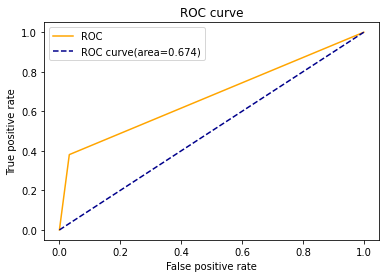

In [106]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [107]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       400
           1       0.65      0.38      0.48        63

    accuracy                           0.89       463
   macro avg       0.78      0.67      0.71       463
weighted avg       0.87      0.89      0.87       463



# Gradient Boosting

In [108]:
gbdt=GradientBoostingClassifier()

In [109]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [110]:
Y_pred=gbdt.predict(X_test)


In [111]:
accuracy=accuracy_score(Y_test,Y_pred)

In [112]:
accuracy

0.896328293736501

In [113]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[388,  12],
       [ 36,  27]], dtype=int64)

In [114]:
auc=roc_auc_score(Y_test,Y_pred)

In [115]:
auc

0.6992857142857143

In [116]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

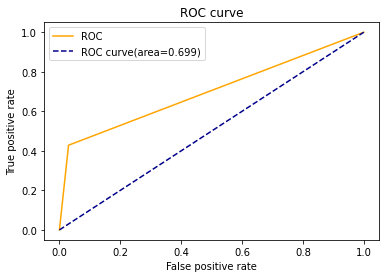

In [117]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [118]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       400
           1       0.69      0.43      0.53        63

    accuracy                           0.90       463
   macro avg       0.80      0.70      0.74       463
weighted avg       0.88      0.90      0.89       463



# GBDT WITH HYPER PARAMETER

In [119]:
gbdt=GradientBoostingClassifier()

In [120]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [121]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [122]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [123]:
clf.best_params_

{'learning_rate': 0.4,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [124]:
Y_pred=clf.predict(X_test)


In [125]:
accuracy=accuracy_score(Y_test,Y_pred)

In [126]:
accuracy

0.9136069114470843

In [127]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[383,  17],
       [ 23,  40]], dtype=int64)

In [128]:
auc=roc_auc_score(Y_test,Y_pred)

In [129]:
auc

0.7962103174603175

In [130]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

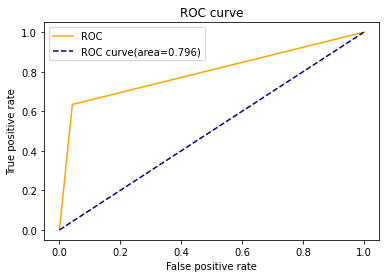

In [131]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [132]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       400
           1       0.70      0.63      0.67        63

    accuracy                           0.91       463
   macro avg       0.82      0.80      0.81       463
weighted avg       0.91      0.91      0.91       463



# Conclusion:
Conducted 4 models on Red wine Project Project dataset namely 
KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning 
It comes to a conclusion that Gradient Boosting Model is providing best score for Red wine Project dataset 
Accuracy=0.9136069114470843, with higher AUC ROC value

In [133]:
md=[knn,rf,dt,gbdt]
import pickle
filename="Redwine.pkl"
pickle.dump(md,open(filename,"wb"))